# 수시과제 #1 (15%) : 4/14(목) 수업시간 전까지 제출

빅데이터마이닝 수시과제 #1: 4.14(목) 수업시간 전까지   

아래 테이블과 같이 6주차에서 배운 다양한 모델과 파라미터 설정을 통해 최적의 모델을 선택하는 과정을 보여주시오

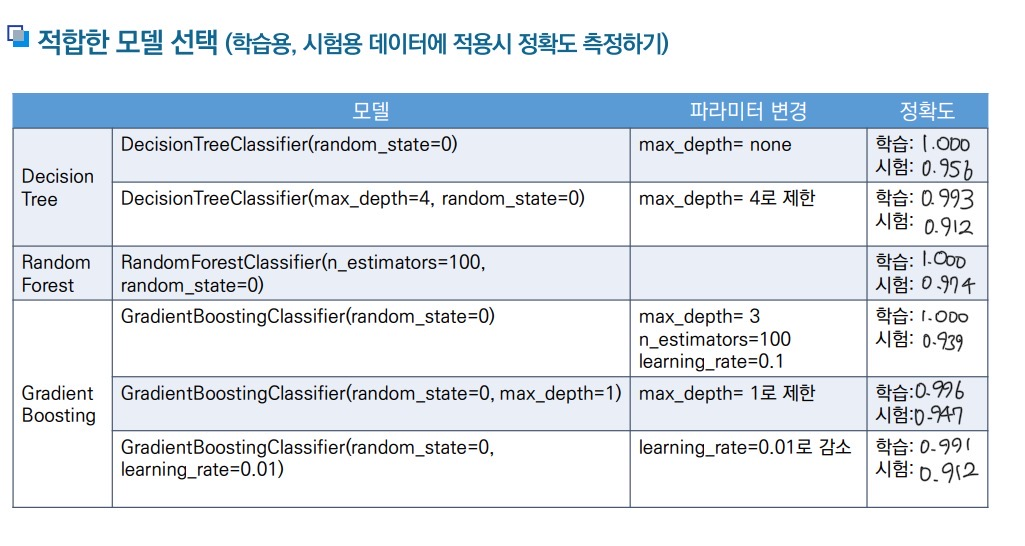

In [1]:
import pandas as pd
import numpy as np

In [2]:
# csv 데이터 가져오기, id를 인덱스로 지정
# wisc = pd.read_csv("/content/drive/MyDrive/2022-01/빅데이터마이닝/실습/wisc_bc_data.csv", index_col='id')
wisc = pd.read_csv("/content/wisc_bc_data.csv", index_col='id')
wisc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
# train test split
from sklearn.model_selection import train_test_split

X = wisc.iloc[:, 1:]  # 30개 변수 
y = wisc.iloc[:, 0]   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할 8:2
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## DecisionTree

In [4]:
# DecisionTreeClassifier 모델 선정
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth = None)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.956


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

tree = DecisionTreeClassifier(random_state=0, max_depth = 4)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.993
시험용 데이터 정확도: 0.912


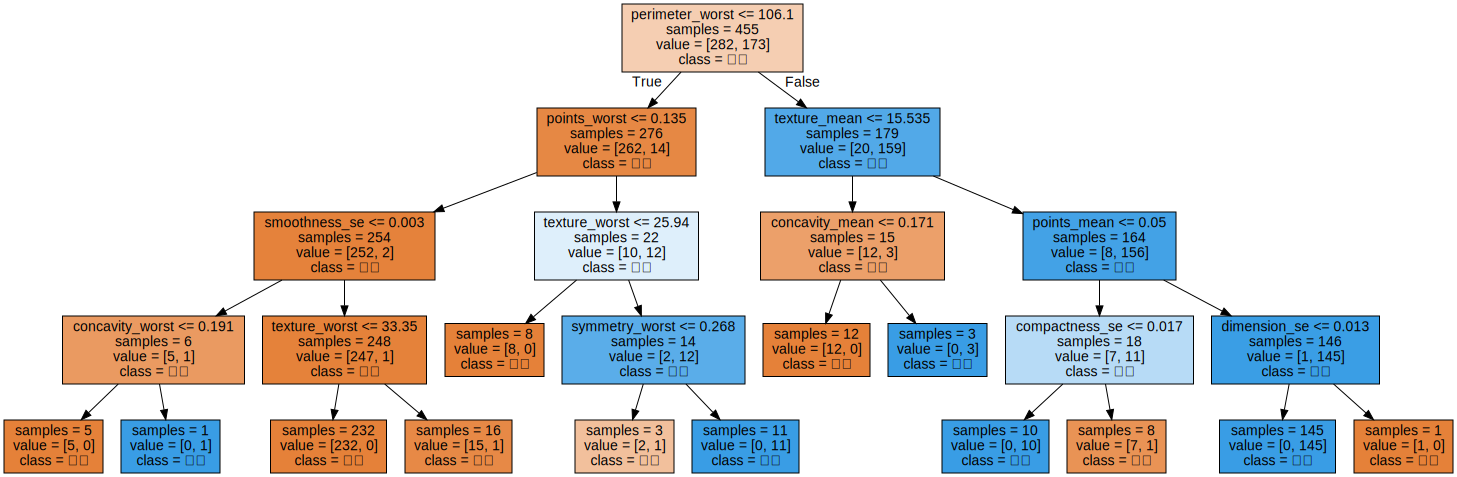

In [6]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=wisc.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## RandomForest

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.974


## Gradient Boosting

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth = 3, n_estimators = 100, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.939


In [9]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.996
시험용 데이터 세트 정확도: 0.947


In [10]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.991
시험용 데이터 세트 정확도: 0.912


# (Advanced) K-Fold Cross Validation

In [11]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.93478261 0.95652174 0.95652174 0.95652174 0.89130435 0.93333333
 0.86666667 0.91111111 1.         0.91111111]
Random forest:  [0.93478261 1.         0.97826087 0.97826087 0.93478261 0.97777778
 0.97777778 0.91111111 0.97777778 0.95555556]
Gradient boosting:  [0.97826087 0.95652174 0.97826087 0.91304348 0.89130435 0.93333333
 0.97777778 0.93333333 0.97777778 0.95555556]
Accuracy mean
Decision tree :0.932
Random forest :0.963
Gradient boosting :0.950


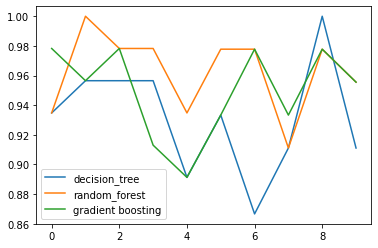

In [12]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boosting', gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [13]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=100)  # 100번 잘라보기

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=100, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.944
Random forest :0.959
Gradient boosting :0.951


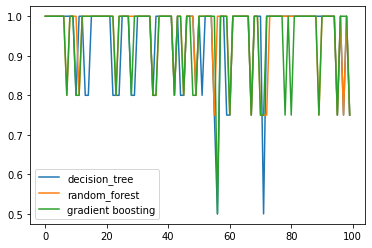

In [14]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boosting', gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

# (Advanced) Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [16]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=1, random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.960439,7,0.960526,0.960526,0.960265
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.964840,1,0.980263,0.947368,0.966887
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.962661,2,0.967105,0.947368,0.973510
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.960439,7,0.960526,0.960526,0.960265
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.962661,2,0.967105,0.947368,0.973510
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.962661,2,0.967105,0.947368,0.973510
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.951653,10,0.960526,0.940789,0.953642
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.962661,2,0.967105,0.947368,0.973510
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.960468,6,0.960526,0.947368,0.973510
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.942852,14,0.953947,0.934211,0.940397


In [17]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.9648


In [18]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.939
